### South Area Anomaly

This script will determine the start of the event for the northern region of interest and determine how many 'hits' there are for the event. 

Note: The final paper for the project should be no more than 2500 words

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from metpy.units import units
from metpy import calc as mpcalc
import scipy.stats as stats
import math
import netCDF4
from netCDF4 import Dataset
from datetime import datetime, date, timedelta
from itertools import chain

In [2]:
#Reading in rd_t Datasets made in ensemble_mean script (odd=hightop, even=lowtop)
ct_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/south_erai_t_llmn.nc")
stdvt_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/south_erai_stdvt_llmn.nc")
rt_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/south_era5_llmn.nc")
t_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/ecmwf_llmn_south.nc")
t2_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/eccc_llmn_south.nc")
t3_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/ukmo_llmn_south.nc")
t4_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/cma_llmn_south.nc")
t5_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/jma_llmn_south.nc")
t6_llmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/atm561/final_proj/rd_data/cnr_llmn_south.nc")

In [3]:
t_llmn_ds

<xarray.Dataset>
Dimensions:  (number: 50, step: 47, date: 8)
Coordinates:
    level    int32 ...
  * number   (number) int32 1 2 3 4 5 6 7 8 9 10 ... 42 43 44 45 46 47 48 49 50
  * step     (step) timedelta64[ns] 0 days 1 days 2 days ... 45 days 46 days
  * date     (date) datetime64[ns] 2021-01-04 2021-01-07 ... 2021-01-28
Data variables:
    t        (date, step, number) float32 ...

In [4]:
#Creating variables for the step and date of forecast
step = t_llmn_ds.step["step.days"] #<-- days forecasted out (47)
fd = t_llmn_ds.date["date.dayofyear"] #<--day of forecast(8)
step2 = t2_llmn_ds.step["step.days"] #<-- days forecasted out (32)
fd2 = t2_llmn_ds.date["date.dayofyear"] #<--day of forecast(4)
step3 = t3_llmn_ds.step["step.days"] 
fd3 = t3_llmn_ds.date["date.dayofyear"]
step4 = t4_llmn_ds.step["step.days"] 
fd4 = t4_llmn_ds.date["date.dayofyear"]
step5 = t5_llmn_ds.step["step.days"] 
fd5 = t5_llmn_ds.date["date.dayofyear"]
step6 = t6_llmn_ds.step["step.days"]
fd6 = t6_llmn_ds.date["date.dayofyear"]

#Creating time and number variables
time = ct_llmn_ds['time']
rt_time = rt_llmn_ds.time['time.dayofyear']
n1 = t_llmn_ds['number'].to_numpy()
n2 = t2_llmn_ds['number'].to_numpy()
n3 = t3_llmn_ds['number'].to_numpy()
n4 = t4_llmn_ds['number'].to_numpy()
n5 = t5_llmn_ds['number'].to_numpy()
n6 = t6_llmn_ds['number'].to_numpy()

In [5]:
n1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int32)

In [6]:
#Creating data array of forecast day and step
doy1 = fd + step
doy2 = fd2 + step2
doy3 = fd3 + step3
doy4 = fd4 + step4
doy5 = fd5 + step5
doy6 = fd6 + step6

In [7]:
#Assigning number to climo lat/lon means
ct1_match = ct_llmn_ds.assign_coords(number=t_llmn_ds['number']).sel(time=doy1, number=n1)
ct2_match = ct_llmn_ds.assign_coords(number=('number', n2)).sel(time=doy2)
ct3_match = ct_llmn_ds.assign_coords(number=('number', n3)).sel(time=doy3)
ct4_match = ct_llmn_ds.assign_coords(number=('number', n4)).sel(time=doy4)
ct5_match = ct_llmn_ds.assign_coords(number=('number', n5)).sel(time=doy5)
ct6_match = ct_llmn_ds.assign_coords(number=('number', n6)).sel(time=doy6)

#Giving climo data forecast days and steps
ct_rt_match = ct_llmn_ds.sel(time=rt_time)
stdvt_match = stdvt_llmn_ds.sel(time=rt_time)

Calculating the temperature anomalies for the model data and the era-5 data

In [8]:
#Calculating Mean Area Temp Anoms
anom_t = t_llmn_ds - ct1_match
anom_t2 = t2_llmn_ds - ct2_match
anom_t3 = t3_llmn_ds - ct3_match
anom_t4 = t4_llmn_ds - ct4_match
anom_t5 = t5_llmn_ds - ct5_match
anom_t6 = t6_llmn_ds - ct6_match
anom_rt = rt_llmn_ds.t.values - ct_rt_match.t.values

In [9]:
#Era-5 data is weird so, I'm making the actual anomalies back into xarray
anom_rt_ds = xr.DataArray(data=anom_rt, dims=["time"], coords=dict(time=rt_time),
                        attrs=dict(description="Temperature Anomaly", units="Kelvin"))

In [10]:
ct_std = np.std(ct1_match.t).values
t_std = np.std(anom_t.t).values
ct_std

array(1.95195162)

In [11]:
#Calculating the ensemble mean in order to run the 2-pair t-test
ensmn_anom_t = anom_t.mean(dim=['number'])
ensmn_anom_t2 = anom_t2.mean(dim=['number'])
ensmn_anom_t3 = anom_t3.mean(dim=['number'])
ensmn_anom_t4 = anom_t4.mean(dim=['number'])
ensmn_anom_t5 = anom_t5.mean(dim=['number'])
ensmn_anom_t6 = anom_t6.mean(dim=['number'])

In [12]:
t_statistic, p_value = stats.ttest_1samp(ensmn_anom_t.t, ct1_match.t)
t2_statistic, p2_value = stats.ttest_1samp(ensmn_anom_t2.t, ct2_match.t)
t3_statistic, p3_value = stats.ttest_1samp(ensmn_anom_t3.t, ct3_match.t)
t4_statistic, p4_value = stats.ttest_1samp(ensmn_anom_t4.t, ct4_match.t)
t5_statistic, p5_value = stats.ttest_1samp(ensmn_anom_t5.t, ct5_match.t)
t6_statistic, p6_value = stats.ttest_1samp(ensmn_anom_t6.t, ct6_match.t)

In [13]:
stdvt_match_plot = -.75* stdvt_match
stdvt_match_plot.t[36].values

array(-4.9929132, dtype=float32)

In [14]:
#Creating list of dates to plot on Timeseries
dates_to_plot=[]
for i in anom_rt_ds['time']:
    
    days = anom_rt_ds.time[i-1] 
    year = "2021"
# Initializing start date
    strt_date = date(int(year), 1, 1)
# converting to date
    res_date = strt_date + timedelta(days=int(days) - 1)
    res = res_date.strftime("%m-%d")
    dates_to_plot.append(res)


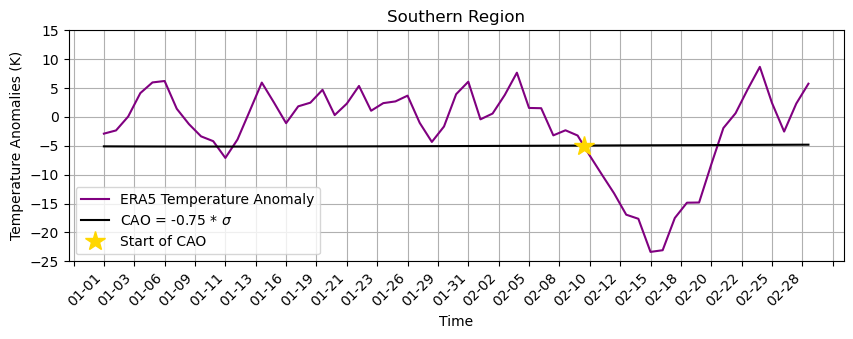

In [15]:
#ERA5 Temperature Anomalies Jan & Feb 2021
#Plotting the actual temperature anomalies
#Plotting the actual temperature anomalies
plt.plot(dates_to_plot, anom_rt_ds, color='purple', label = 'ERA5 Temperature Anomaly')
plt.plot(dates_to_plot, stdvt_match_plot.t, color = 'black', label = 'CAO = -0.75 * $\sigma$')
plt.plot(39.5,stdvt_match_plot.t[40].values, '*', color= 'gold', label = 'Start of CAO', markersize=15)
plt.grid(True)
plt.title('Southern Region')
plt.xlabel('Time')
plt.ylabel('Temperature Anomalies (K)')
plt.legend()
fig = mlp.pyplot.gcf()
fig.set_size_inches(10, 3)
plt.ylim(-25, 15)
plt.xticks(rotation=45, ha='right')
plt.xaxis.set_major_locator(plt.MaxNLocator(30));

### Onset/length of the CAO which was determined to be Feb 10th-20th for the Northern Region

In [16]:
time_of_CAO = anom_rt_ds <= -.75* stdvt_match
time_of_CAO.where(True)

<xarray.Dataset>
Dimensions:  (time: 59)
Coordinates:
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 55.0 56.0 57.0 58.0 59.0
    hour     float64 ...
    lev      int32 ...
    level    int32 ...
Data variables:
    t        (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

In [17]:
dateyouwant = datetime(2021, 2, 10, 0, 0, 0)
dateyouwant.strftime("%Y-%m-%d %H:%M:%S:%f")

'2021-02-10 00:00:00:000000'

In [18]:
anom_t5

<xarray.Dataset>
Dimensions:  (number: 49, step: 33, date: 4)
Coordinates:
    level    int32 1000
  * number   (number) int32 1 2 3 4 5 6 7 8 9 10 ... 41 42 43 44 45 46 47 48 49
  * step     (step) timedelta64[ns] 0 days 12:00:00 ... 32 days 12:00:00
  * date     (date) datetime64[ns] 2021-01-06 2021-01-13 2021-01-20 2021-01-27
    time     (date, step) float64 6.0 7.0 8.0 9.0 10.0 ... 56.0 57.0 58.0 59.0
    hour     float64 ...
    lev      int32 ...
Data variables:
    t        (date, step, number) float32 1.475 0.5235 1.624 ... 1.121 4.724

In [19]:
dayiwant=anom_t['date'][0] + anom_t['step'][37]

dayiwant_jma=anom_t5['date'][1] + anom_t5['step'][28] #<--need a different variable for JMA bc steps are at hour12

In [20]:
#This is looping over each of the models in order to determine the date and step needed in 
# order to get the wanted date (FEB 7th)
stp1 = []
for ii in anom_t['date']:
    for jj in anom_t['step']:
        if ii + jj == dayiwant:
            ii1 = ii.date.values
            jj1 = jj.step.dt.days.values.tolist()
            stp1.append(jj1)
            #print(f'ECMWF:{ii1}, {jj1}')
stp2 = []
for ii in anom_t2['date']:
    for jj in anom_t2['step']:
        if ii + jj == dayiwant:
            ii2 = ii.date.values
            jj2 = jj.step.dt.days.values.tolist()
            stp2.append(jj2)
#            print(f'ECCC:{ii2}, {jj2}')
stp3 = []            
for ii in anom_t3['date']:
    for jj in anom_t3['step']:
        if ii + jj == dayiwant:
            ii3 = ii.date.values
            jj3 = jj.step.dt.days.values.tolist()
            stp3.append(jj3)
#            print(f'UKMO:{ii3}, {jj3}')
stp4 = []                        
for ii in anom_t4['date']:
    for jj in anom_t4['step']:
        if ii + jj == dayiwant:
            ii4 = ii.date.values
            jj4 = jj.step.dt.days.values.tolist()
            stp4.append(jj4)
#            print(f'CMA:{ii4}, {jj4}')
stp5 = []                        
for ii in anom_t5['date']:
    for jj in anom_t5['step']:
        if ii + jj == dayiwant_jma:
            ii5 = ii.date.values
            jj5 = jj.step.dt.days.values.tolist()
            stp5.append(jj5)
#            print(f'JMA:{ii5}, {jj5}')
stp6 = []            
for ii in anom_t6['date']:
    for jj in anom_t6['step']:
        if ii + jj == dayiwant:
            ii6 = ii.date.values
            jj6 = jj.step.dt.days.values.tolist()
            stp6.append(jj6)
#            print(f'CNR:{ii6}, {jj6}')

In [21]:
cao_length = slice("2021-02-07T00:00:00.000000000", "2021-02-20T00:00:00.000000000")

In [22]:
stdv_cao_len = stdvt_match.t.isel(time = slice(40,51))
cao_len = stdvt_match.time.isel(time = slice(40,51))

In [23]:
stdv_cao_len

<xarray.DataArray 't' (time: 11)>
array([6.612547, 6.601435, 6.590364, 6.579338, 6.56836 , 6.557429, 6.546542,
       6.535693, 6.524872, 6.514068, 6.503269], dtype=float32)
Coordinates:
  * time     (time) float64 41.0 42.0 43.0 44.0 45.0 ... 48.0 49.0 50.0 51.0
    hour     float64 ...
    lev      int32 ...
    level    int32 ...

In [24]:
ecmwf_hit_list=[]
for m in range(0,8,1):
    hits_by_row=[]
    for n in range(0,11,1):
        at_sel1 = anom_t.sel(date = anom_t.date == anom_t.date[m], step=anom_t.step.dt.days == stp1[m]+n)
        cao_t1 = at_sel1 <= -0.75 * stdv_cao_len[n]
        ct = cao_t1.where(cao_t1.t == True)
        ct_tot = ct.sum().t.values 
        ct_tot_list = ct_tot.tolist()
        hits_by_row.append(ct_tot_list)
    ecmwf_hit_list.append(hits_by_row)
print(f'Number of hits:{ecmwf_hit_list}')

Number of hits:[[6.0, 7.0, 9.0, 9.0, 5.0, 9.0, 10.0, 10.0, 6.0, 6.0, 0.0], [7.0, 8.0, 5.0, 5.0, 7.0, 8.0, 5.0, 6.0, 5.0, 2.0, 6.0], [5.0, 5.0, 6.0, 6.0, 4.0, 4.0, 7.0, 10.0, 9.0, 4.0, 3.0], [8.0, 5.0, 6.0, 3.0, 4.0, 8.0, 5.0, 3.0, 7.0, 14.0, 13.0], [5.0, 8.0, 8.0, 3.0, 6.0, 6.0, 8.0, 9.0, 6.0, 8.0, 9.0], [6.0, 7.0, 7.0, 6.0, 8.0, 6.0, 7.0, 8.0, 8.0, 14.0, 11.0], [6.0, 3.0, 2.0, 9.0, 7.0, 7.0, 8.0, 8.0, 13.0, 11.0, 10.0], [5.0, 4.0, 4.0, 7.0, 11.0, 18.0, 13.0, 14.0, 10.0, 8.0, 9.0]]


In [25]:
#Need to change the n value to be the actual length of the event

In [26]:
eccc_hit_list=[]
for m in range(0,3,1):
    hits_by_rows=[]
    for n in range(0,11,1):
        at_sel1 = anom_t2.sel(date = anom_t2.date == anom_t2.date[m], step=anom_t2.step.dt.days == stp2[m]+n)
        cao_t1 = at_sel1 <= -0.75 * stdv_cao_len[n]
        ct = cao_t1.where(cao_t1.t == True)
        ct_tot = ct.sum().t.values 
        ct_tot_list = ct_tot.tolist()
        hits_by_rows.append(ct_tot_list)
    eccc_hit_list.append(hits_by_rows)
print(eccc_hit_list)

[[2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 3.0, 2.0, 4.0, 4.0, 3.0, 3.0, 5.0, 3.0, 4.0, 3.0], [0.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 2.0, 2.0, 1.0]]


In [27]:
ukmo_hit_list = []
for m in range(0,31,1):
    hits_by_rows=[]
    for n in range(0,11,1):
        at_sel1 = anom_t3.sel(date = anom_t3.date == anom_t3.date[m], step=anom_t3.step.dt.days == stp3[m]+n)
        cao_t1 = at_sel1 <= -0.75 * stdv_cao_len[n]
        ct = cao_t1.where(cao_t1.t == True)
        ct_tot = ct.sum().t.values 
        ct_tot_list = ct_tot.tolist()
        hits_by_rows.append(ct_tot_list)
    ukmo_hit_list.append(hits_by_rows)
print(ukmo_hit_list)

[[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0], [2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0], [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0], [2.0, 3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0, 1.0, 1.0,

In [28]:
cma_hit_list=[]
for m in range(0,8,1):
    hits_by_row=[]
    for n in range(0,11,1):
        at_sel1 = anom_t4.sel(date = anom_t4.date == anom_t4.date[m], step=anom_t4.step.dt.days == stp4[m]+n)
        cao_t1 = at_sel1 <= -0.75 * stdv_cao_len[n]
        ct = cao_t1.where(cao_t1.t == True)
        ct_tot = ct.sum().t.values 
        ct_tot_list = ct_tot.tolist()
        hits_by_row.append(ct_tot_list)
    cma_hit_list.append(hits_by_row)
print(cma_hit_list)

[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.0, 0.0], [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0], [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0], [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]]


In [29]:
jma_hit_list=[]
for m in range(0,3,1):
    hits_by_row=[]
    for n in range(0,11,1):
        at_sel1 = anom_t5.sel(date = anom_t5.date == anom_t5.date[m], step=anom_t5.step.dt.days == stp5[m]+n)
        cao_t1 = at_sel1 <= -0.75 * stdv_cao_len[n]
        ct = cao_t1.where(cao_t1.t == True)
        ct_tot = ct.sum().t.values 
        ct_tot_list = ct_tot.tolist()
        hits_by_row.append(ct_tot_list)
    jma_hit_list.append(hits_by_row)
print(jma_hit_list)

[[4.0, 4.0, 4.0, 6.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 5.0, 6.0, 5.0, 3.0, 6.0, 9.0, 9.0, 9.0, 6.0, 2.0], [1.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 6.0, 9.0, 7.0, 4.0]]


In [30]:
cnr_hit_list=[]
for m in range(0,3,1):
    hits_by_row=[]
    for n in range(0,11,1):
        at_sel1 = anom_t6.sel(date = anom_t6.date == anom_t6.date[m], step=anom_t6.step.dt.days == stp6[m]+n)
        cao_t1 = at_sel1 <= -0.75 * stdv_cao_len[n]
        ct = cao_t1.where(cao_t1.t == True)
        ct_tot = ct.sum().t.values 
        ct_tot_list = ct_tot.tolist()
        hits_by_row.append(ct_tot_list)
    cnr_hit_list.append(hits_by_row)
print(cnr_hit_list)

[[3.0, 1.0, 3.0, 2.0, 5.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 6.0, 6.0, 7.0, 1.0, 2.0, 2.0, 0.0, 3.0, 5.0, 5.0], [0.0, 0.0, 3.0, 3.0, 7.0, 6.0, 7.0, 8.0, 5.0, 6.0, 4.0]]


In [31]:
#Creating a definition to calculate the sum of my nested lists
def nested_sum(my_list):
    total = 0  # don't use `sum` as a variable name
    for i in my_list:
        if isinstance(i, list):  # checks if `i` is a list
            total += nested_sum(i)
        else:
            total += i
    return total

In [32]:
#Calculating the sums of the hit lists
ecmwf_hits = nested_sum(ecmwf_hit_list)
eccc_hits = nested_sum(eccc_hit_list)
ukmo_hits = nested_sum(ukmo_hit_list)
cma_hits = nested_sum(cma_hit_list)
jma_hits = nested_sum(jma_hit_list)
cnr_hits = nested_sum(cnr_hit_list)

In [33]:
#Calculating the total % of hits for the length of the CAO
ecmwf_totper = 100 * ecmwf_hits/(50*11*8) #<-denominator = ensembles * CAO length * # of initialization dates
eccc_totper = 100 * eccc_hits/(20*11*3)
ukmo_totper = 100 * ukmo_hits/(3*11*31)
cma_totper = 100 * cma_hits/(3*11*8)
jma_totper = 100 * jma_hits/(49*11*3)
cnr_totper = 100 * cnr_hits/(40*11*3)

In [34]:
#calculating total HT and LT %
ht_totper = (ecmwf_totper + ukmo_totper + jma_totper)/3
lt_totper = (eccc_totper + cma_totper + cnr_totper)/3

In [35]:
#Creating Slices in order to select dates that are weekly
##Note: There's no wk1 because there are no forecasts initialized in Feb.
wk2 = slice("2021-01-25T00:00:00.000000000", "2021-01-31T00:00:00.000000000") #<--  7-13 days in advance
wk3 = slice("2021-01-18T00:00:00.000000000", "2021-01-24T00:00:00.000000000") #<-- 14-20 days in advance
wk4 = slice("2021-01-11T00:00:00.000000000", "2021-01-17T00:00:00.000000000") #<-- 21-27 days in advance 
wk5 = slice("2021-01-04T00:00:00.000000000", "2021-01-10T00:00:00.000000000") #<-- 28-34 days in advance
#making the weeks into a list
weeks = [wk2, wk3, wk4, wk5]

Below I'll be determining how many initialization dates fall into each date range for each model

In [36]:
ecmwf_wk2 = anom_t.sel(date = wk2).date #<-- 1/25, 1/28
ecmwf_wk3 = anom_t.sel(date = wk3).date #<-- 1/18, 1/21
ecmwf_wk4 = anom_t.sel(date = wk4).date #<-- 1/11, 1/14
ecmwf_wk5 = anom_t.sel(date = wk5).date #<-- 1/4, 1/7

In [37]:
eccc_wk2 = anom_t2.sel(date = wk2).date #<-- 1/28
eccc_wk3 = anom_t2.sel(date = wk3).date #<-- 1/21
eccc_wk4 = anom_t2.sel(date = wk4).date #<-- 1/14

In [38]:
ukmo_wk2 = anom_t3.sel(date = wk2).date #<-- 1/25, 1/26, 1/27, 1/28, 1/29, 1/30, 1/31
ukmo_wk3 = anom_t3.sel(date = wk3).date #<-- 1/18, 1/19, 1/20, 1/21, 1/22, 1/23, 1/24
ukmo_wk4 = anom_t3.sel(date = wk4).date #<-- 1/11, 1/12, 1/13, 1/14, 1/15, 1/16, 1/17
ukmo_wk5 = anom_t3.sel(date = wk5).date #<-- 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10

In [39]:
cma_wk2 = anom_t4.sel(date = wk2).date #<-- 1/25, 1/28
cma_wk3 = anom_t4.sel(date = wk3).date #<-- 1/18, 1/21
cma_wk4 = anom_t4.sel(date = wk4).date #<-- 1/11, 1/14
cma_wk5 = anom_t4.sel(date = wk5).date #<-- 1/4, 1/7

In [40]:
jma_wk2 = anom_t5.sel(date = wk2).date #<-- 1/27
jma_wk3 = anom_t5.sel(date = wk3).date #<-- 1/20
jma_wk4 = anom_t5.sel(date = wk4).date #<-- 1/13

In [41]:
cnr_wk2 = anom_t6.sel(date = wk2).date #<-- 1/28
cnr_wk3 = anom_t6.sel(date = wk3).date #<-- 1/21
cnr_wk4 = anom_t6.sel(date = wk4).date #<-- 1/14

Below I will be noting the number of hits per these date ranges which will be done manually.

In [42]:
ecmwf_wk5_tothits = np.sum(ecmwf_hit_list[0:2])
ecmwf_wk4_tothits = np.sum(ecmwf_hit_list[2:4])
ecmwf_wk3_tothits = np.sum(ecmwf_hit_list[4:6])
ecmwf_wk2_tothits = np.sum(ecmwf_hit_list[6:8])

In [43]:
eccc_wk4_tothits = np.sum(eccc_hit_list[0:1])
eccc_wk3_tothits = np.sum(eccc_hit_list[1:2])
eccc_wk2_tothits = np.sum(eccc_hit_list[2:3])

In [44]:
ukmo_wk5_tothits = np.sum(ukmo_hit_list[0:7])
ukmo_wk4_tothits = np.sum(ukmo_hit_list[7:14])
ukmo_wk3_tothits = np.sum(ukmo_hit_list[14:21])
ukmo_wk2_tothits = np.sum(ukmo_hit_list[21:28])

In [45]:
cma_wk5_tothits = np.sum(cma_hit_list[0:2])
cma_wk4_tothits = np.sum(cma_hit_list[2:4])
cma_wk3_tothits = np.sum(cma_hit_list[4:6])
cma_wk2_tothits = np.sum(cma_hit_list[6:8])

In [46]:
jma_wk4_tothits = np.sum(jma_hit_list[0:1])
jma_wk3_tothits = np.sum(jma_hit_list[1:2])
jma_wk2_tothits = np.sum(jma_hit_list[2:3])

In [47]:
cnr_wk4_tothits = np.sum(cnr_hit_list[0:1])
cnr_wk3_tothits = np.sum(cnr_hit_list[1:2])
cnr_wk2_tothits = np.sum(cnr_hit_list[2:3])

In [47]:
#Determining the percent for each week for ECMWF
ecmwf_wk5per = 100 * ecmwf_wk5_tothits / (50*11*2) #<- denominator = ensembles * steps * dates
ecmwf_wk4per = 100 * ecmwf_wk4_tothits / (50*11*2)
ecmwf_wk3per = 100 * ecmwf_wk3_tothits / (50*11*2)
ecmwf_wk2per = 100 * ecmwf_wk2_tothits / (50*11*2)

In [48]:
#Determining the percent for each week for ECCC
eccc_wk4per = 100 * eccc_wk4_tothits / (20*11*1) #<- denominator = ensembles * steps * dates
eccc_wk3per = 100 * eccc_wk3_tothits / (20*11*1)
eccc_wk2per = 100 * eccc_wk2_tothits / (20*11*1)

In [49]:
#Determining the percent for each week for UKMO
ukmo_wk5per = 100 * ukmo_wk5_tothits / (3*11*7) #<- denominator = ensembles * steps * dates
ukmo_wk4per = 100 * ukmo_wk4_tothits / (3*11*7)
ukmo_wk3per = 100 * ukmo_wk3_tothits / (3*11*7)
ukmo_wk2per = 100 * ukmo_wk2_tothits / (3*11*7)

In [50]:
#Determining the percent for each week for CMA
cma_wk5per = 100 * cma_wk5_tothits / (3*11*2) #<- denominator = ensembles * steps * dates
cma_wk4per = 100 * cma_wk4_tothits / (3*11*2)
cma_wk3per = 100 * cma_wk3_tothits / (3*11*2)
cma_wk2per = 100 * cma_wk2_tothits / (3*11*2)

In [51]:
#Determining the percent for each week for JMA
jma_wk4per = 100 * jma_wk4_tothits / (49*11*1) #<- denominator = ensembles * steps * dates
jma_wk3per = 100 * jma_wk3_tothits / (49*11*1)
jma_wk2per = 100 * jma_wk2_tothits / (49*11*1)

In [52]:
#Determining the percent for each week for JMA
cnr_wk4per = 100 * cnr_wk4_tothits / (40*11*1) #<- denominator = ensembles * steps * dates
cnr_wk3per = 100 * cnr_wk3_tothits / (40*11*1)
cnr_wk2per = 100 * cnr_wk2_tothits / (40*11*1)

In [53]:
ht_wk5per = (ecmwf_wk5per + ukmo_wk5per )/2
ht_wk4per = (ecmwf_wk4per + ukmo_wk4per + jma_wk4per)/3
ht_wk3per = (ecmwf_wk3per + ukmo_wk3per + jma_wk3per)/3
ht_wk2per = (ecmwf_wk2per + ukmo_wk2per + jma_wk2per)/3

In [54]:
lt_wk5per = cma_wk5per
lt_wk4per = (eccc_wk4per + cma_wk4per + cnr_wk4per)/3
lt_wk3per = (eccc_wk3per + cma_wk3per + cnr_wk3per)/3
lt_wk2per = (eccc_wk2per + cma_wk2per + cnr_wk2per)/3

Now I'm printing the percentages of hits 

In [55]:
print(f'ECMWF wk5: {ecmwf_wk5per}')
print(f'ECMWF wk4: {ecmwf_wk4per}')
print(f'ECMWF wk3: {ecmwf_wk3per}')
print(f'ECMWF wk2: {ecmwf_wk2per}')
print(f'ecmwf:{ecmwf_totper}')

ECMWF wk5: 12.818181818181818
ECMWF wk4: 12.636363636363637
ECMWF wk3: 14.909090909090908
ECMWF wk2: 17.0
ecmwf:14.340909090909092


In [56]:
#print(f'ECCC wk5: {eccc_wk5per}')
print(f'ECCC wk4: {eccc_wk4per}')
print(f'ECCC wk3: {eccc_wk3per}')
print(f'ECCC wk2: {eccc_wk2per}')
print(f'ECCC:{eccc_totper}')

ECCC wk4: 8.181818181818182
ECCC wk3: 16.363636363636363
ECCC wk2: 12.272727272727273
ECCC:12.272727272727273


In [57]:
print(f'UKMO wk5: {ukmo_wk5per}')
print(f'UKMO wk4: {ukmo_wk4per}')
print(f'UKMO wk3: {ukmo_wk3per}')
print(f'UKMO wk2: {ukmo_wk2per}')
print(f'UKMO:{ukmo_totper}')

UKMO wk5: 13.852813852813853
UKMO wk4: 14.285714285714286
UKMO wk3: 21.21212121212121
UKMO wk2: 25.974025974025974
UKMO:20.527859237536656


In [58]:
print(f'CMA wk5: {cma_wk5per}')
print(f'CMA wk4: {cma_wk4per}')
print(f'CMA wk3: {cma_wk3per}')
print(f'CMA wk2: {cma_wk2per}')
print(f'CMA:{cma_totper}')

CMA wk5: 22.727272727272727
CMA wk4: 12.121212121212121
CMA wk3: 10.606060606060606
CMA wk2: 25.757575757575758
CMA:17.803030303030305


In [59]:
#print(f'JMA wk5: {jma_wk5per}')
print(f'JMA wk4: {jma_wk4per}')
print(f'JMA wk3: {jma_wk3per}')
print(f'JMA wk2: {eccc_wk2per}') #<--using this b/c there's no value, out of range
print(f'JMA:{jma_totper}')

JMA wk4: 4.452690166975882
JMA wk3: 11.688311688311689
JMA wk2: 12.272727272727273
JMA:8.101422387136672


In [60]:
#print(f'CNR wk5: {cnr_wk5per}')
print(f'CNR wk4: {cnr_wk4per}')
print(f'CNR wk3: {cnr_wk3per}')
print(f'CNR wk2: {eccc_wk2per}') #<--using this b/c there's no value, out of range
print(f'CNR:{cnr_totper}')

CNR wk4: 3.8636363636363638
CNR wk3: 9.090909090909092
CNR wk2: 12.272727272727273
CNR:8.030303030303031


In [61]:
print(f'HT wk5: {ht_wk5per}')
print(f'HT wk4: {ht_wk4per}')
print(f'HT wk3: {ht_wk3per}')
print(f'HT wk2: {ht_wk2per}')
print(f'HT:{ht_totper}')

HT wk5: 13.335497835497836
HT wk4: 10.458256029684602
HT wk3: 15.936507936507937
HT wk2: 17.045763760049475
HT:14.323396905194139


In [62]:
print(f'LT wk5: {lt_wk5per}')
print(f'LT wk4: {lt_wk4per}')
print(f'LT wk3: {lt_wk3per}')
print(f'LT wk2: {lt_wk2per}')
print(f'LT:{lt_totper}')

LT wk5: 22.727272727272727
LT wk4: 8.055555555555555
LT wk3: 12.02020202020202
LT wk2: 16.38888888888889
LT:12.702020202020202
